<a href="https://colab.research.google.com/github/mbozzore/LFT/blob/master/astronnv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn astroNN tensorflow==1.15


Galaxy10.h5:   0%|          | 65.5k/210M [00:00<05:20, 655kB/s]

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


Galaxy10.h5:  99%|█████████▉| 208M/210M [00:08<00:00, 27.0MB/s] 

Downloaded Galaxy10 successfully to /Users/mbozzore/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:09, 22.5MB/s]                           


===================Data Inspection===================


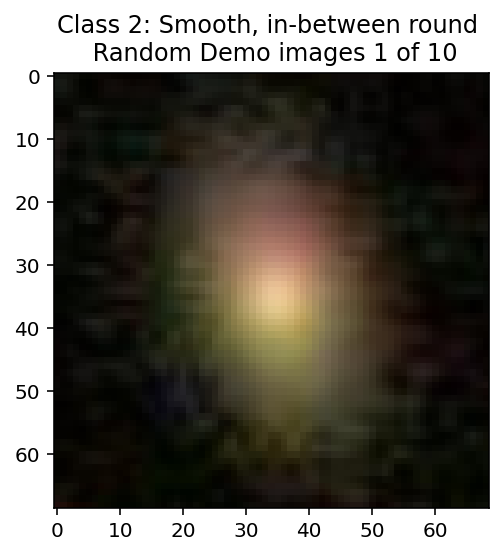

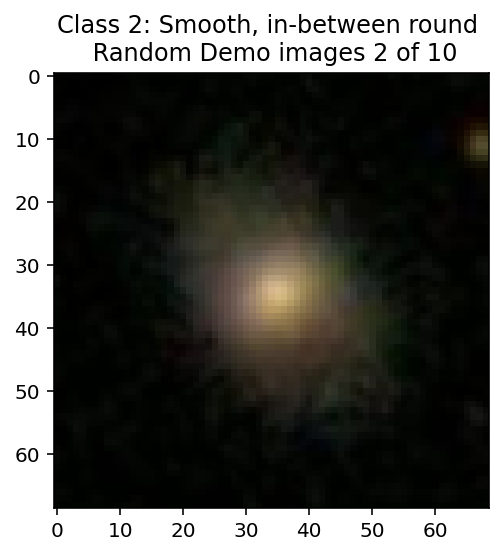

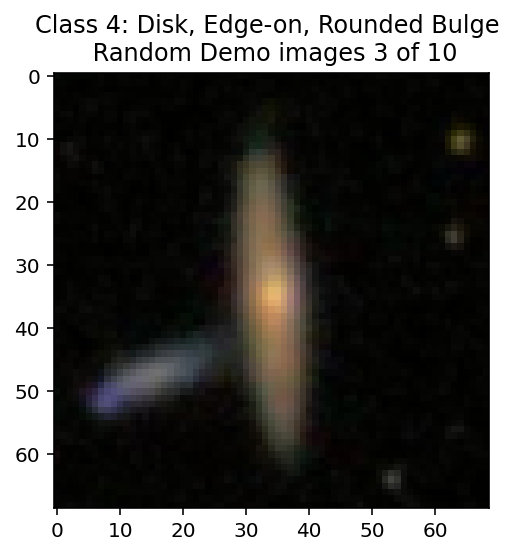

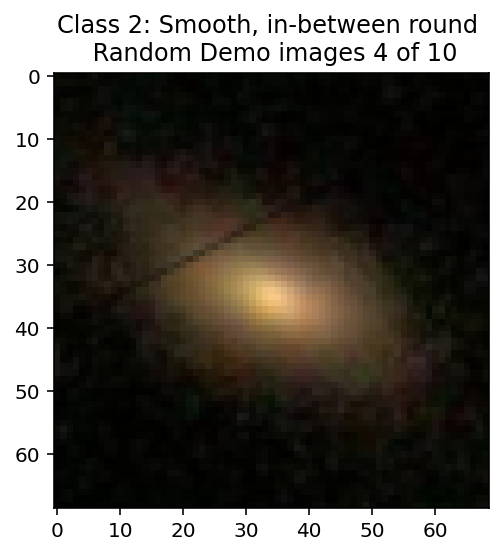

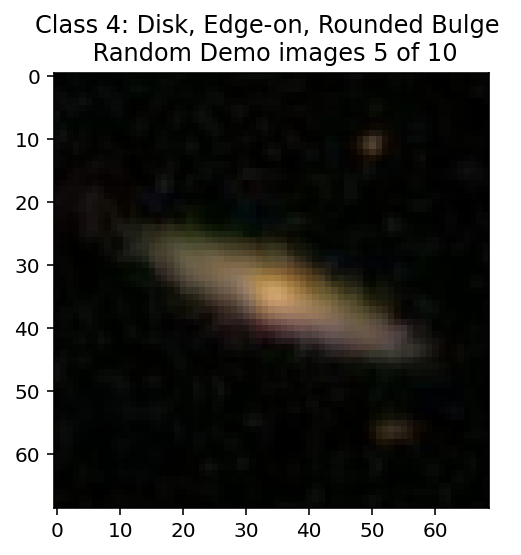

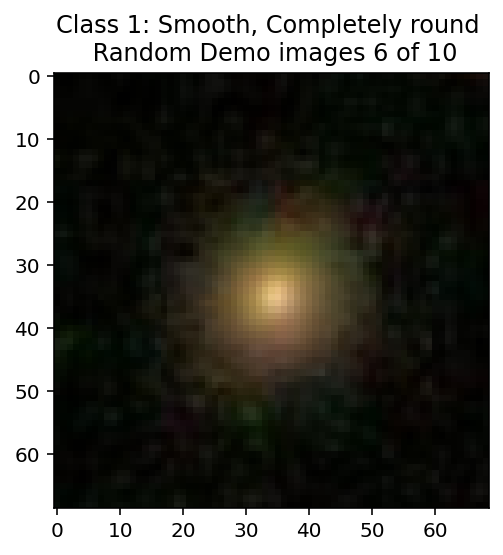

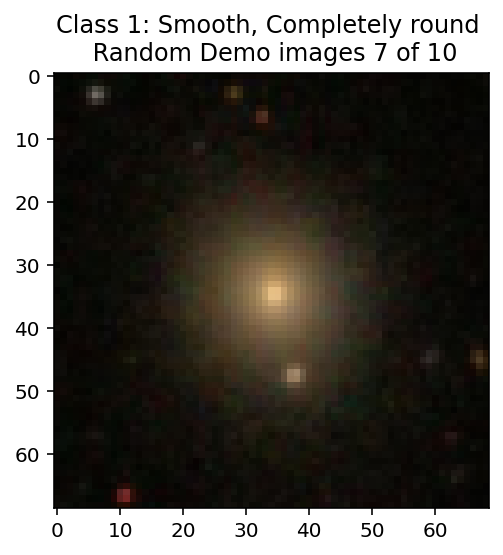

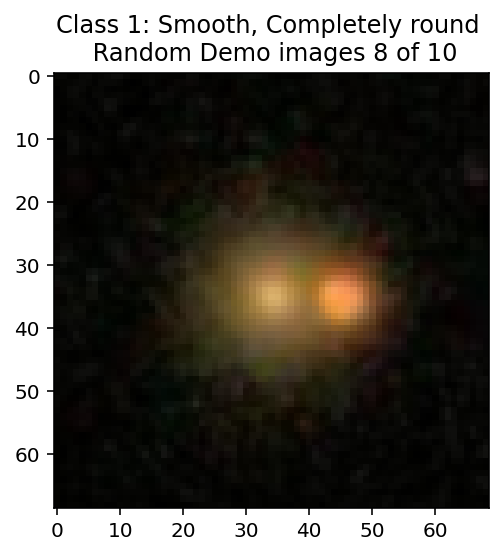

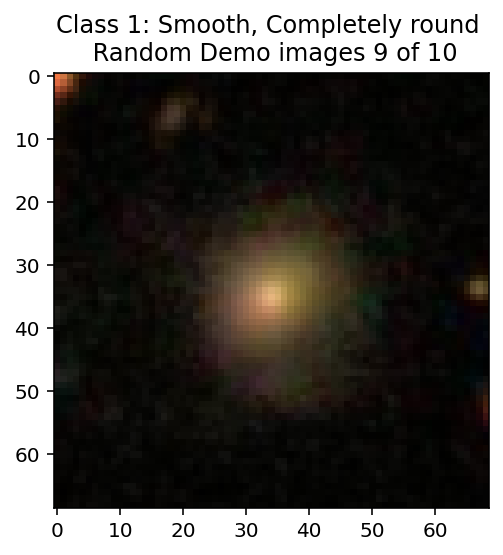

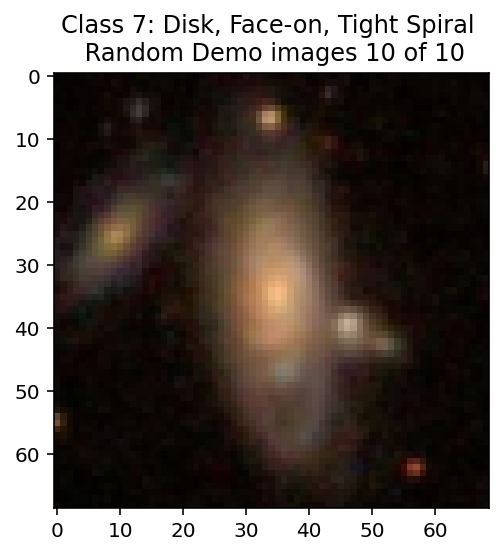

===============Data Inspection Finished===============



Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
Epoch 1/5
275/275 - 27s - loss: 11.5211 - categorical_accuracy: 0.2860 - val_loss: 10.9278 - val_categorical_accuracy: 0.3250
Epoch 2/5
Epoch 1/5
275/275 - 25s - loss: 11.6155 - categorical_accuracy: 0.2817 - val_loss: 4.2755 - val_categorical_accuracy: 0.3415
Epoch 3/5
Epoch 1/5
275/275 - 26s - loss: 2.3415 - categorical_accura

/Users/mbozzore/opt/anaconda3/envs/astronn/lib/python3.6/site-packages/astroNN/datasets/galaxy10.py:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


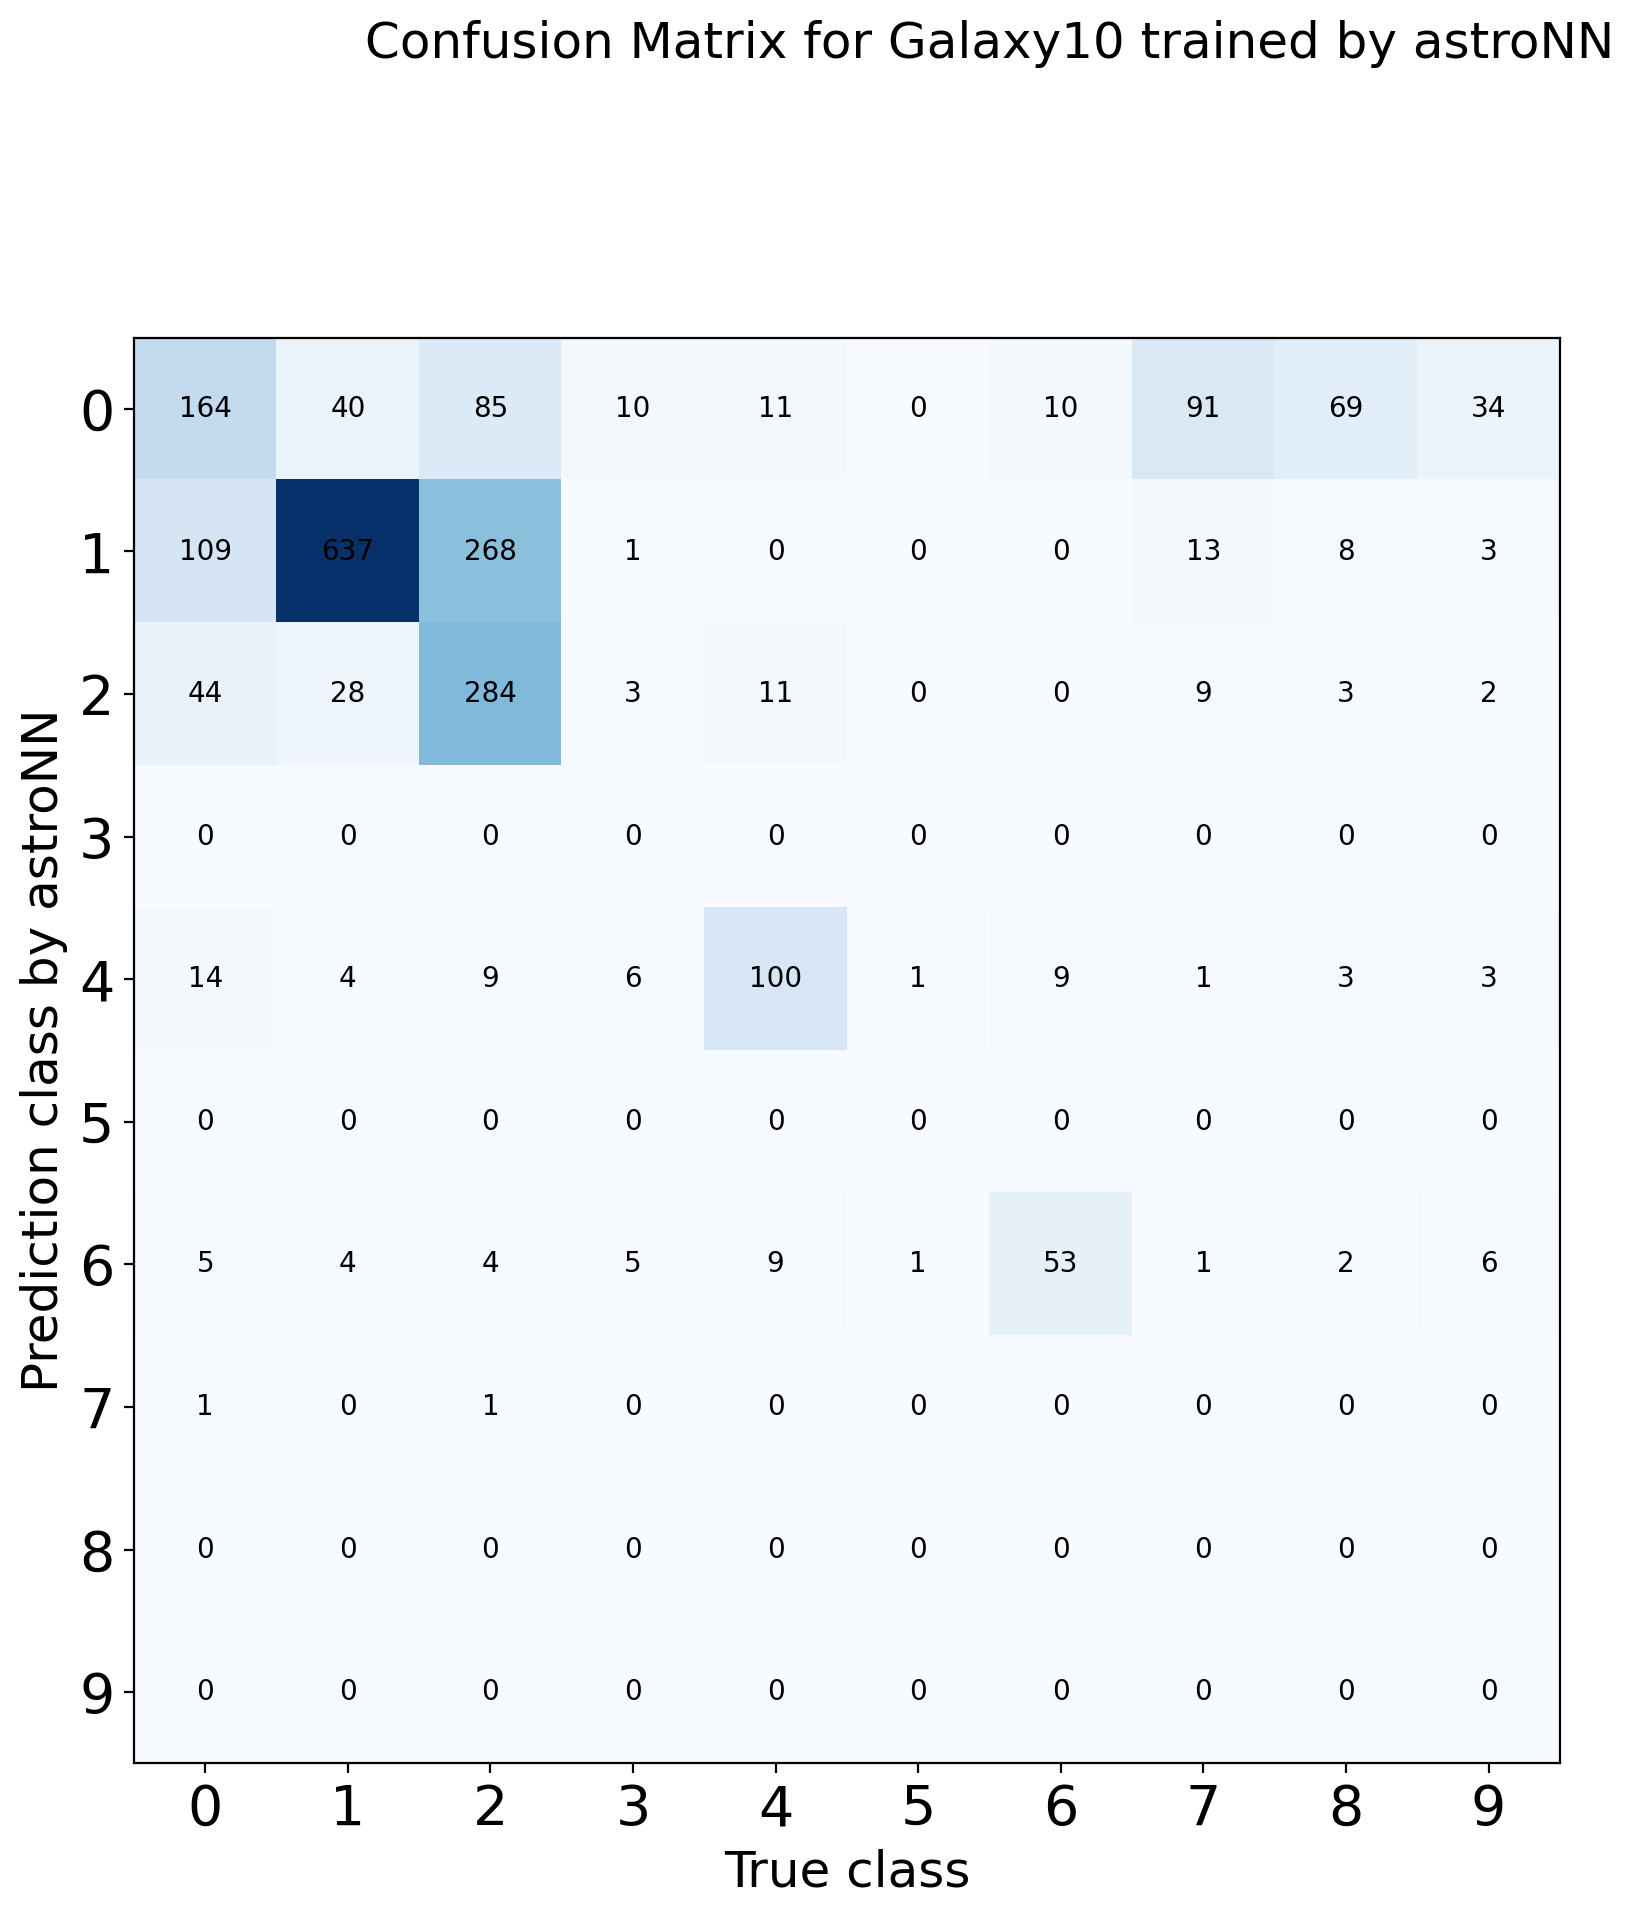

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# import everything we need first
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = galaxy10.load_data()

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

# To create a neural network instance
galaxy10net = Galaxy10CNN()
# set maximum epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 5

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)


Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Epoch 1/15
Epoch 1/15
275/275 - 26s - loss: 1.7717 - categorical_accuracy: 0.3770 - val_loss: 1.4569 - val_categorical_accuracy: 0.4214
Epoch 2/15
Epoch 1/15
275/275 - 25s - loss: 1.3815 - categorical_accuracy: 0.4791 - val_loss: 0.5782 - val_categorical_accuracy: 0.5366
Epoch 3/15
Epoch 1/15
275/275 - 25s - loss: 1.2634 - categorical_accuracy: 0.5244 - val_loss: 0.1054 - val_categorical_accuracy: 0.0000e+00
Epoch 4/15
Epoch 1/15
275/275 - 24s - loss: 1.2031 - categorical_accuracy: 0.5693 - val_loss: 0.1228 - val_categorical_accuracy: 0.0000e+00
Epoch 5/15
Epoch 1/15


/Users/mbozzore/opt/anaconda3/envs/astronn/lib/python3.6/site-packages/astroNN/datasets/galaxy10.py:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


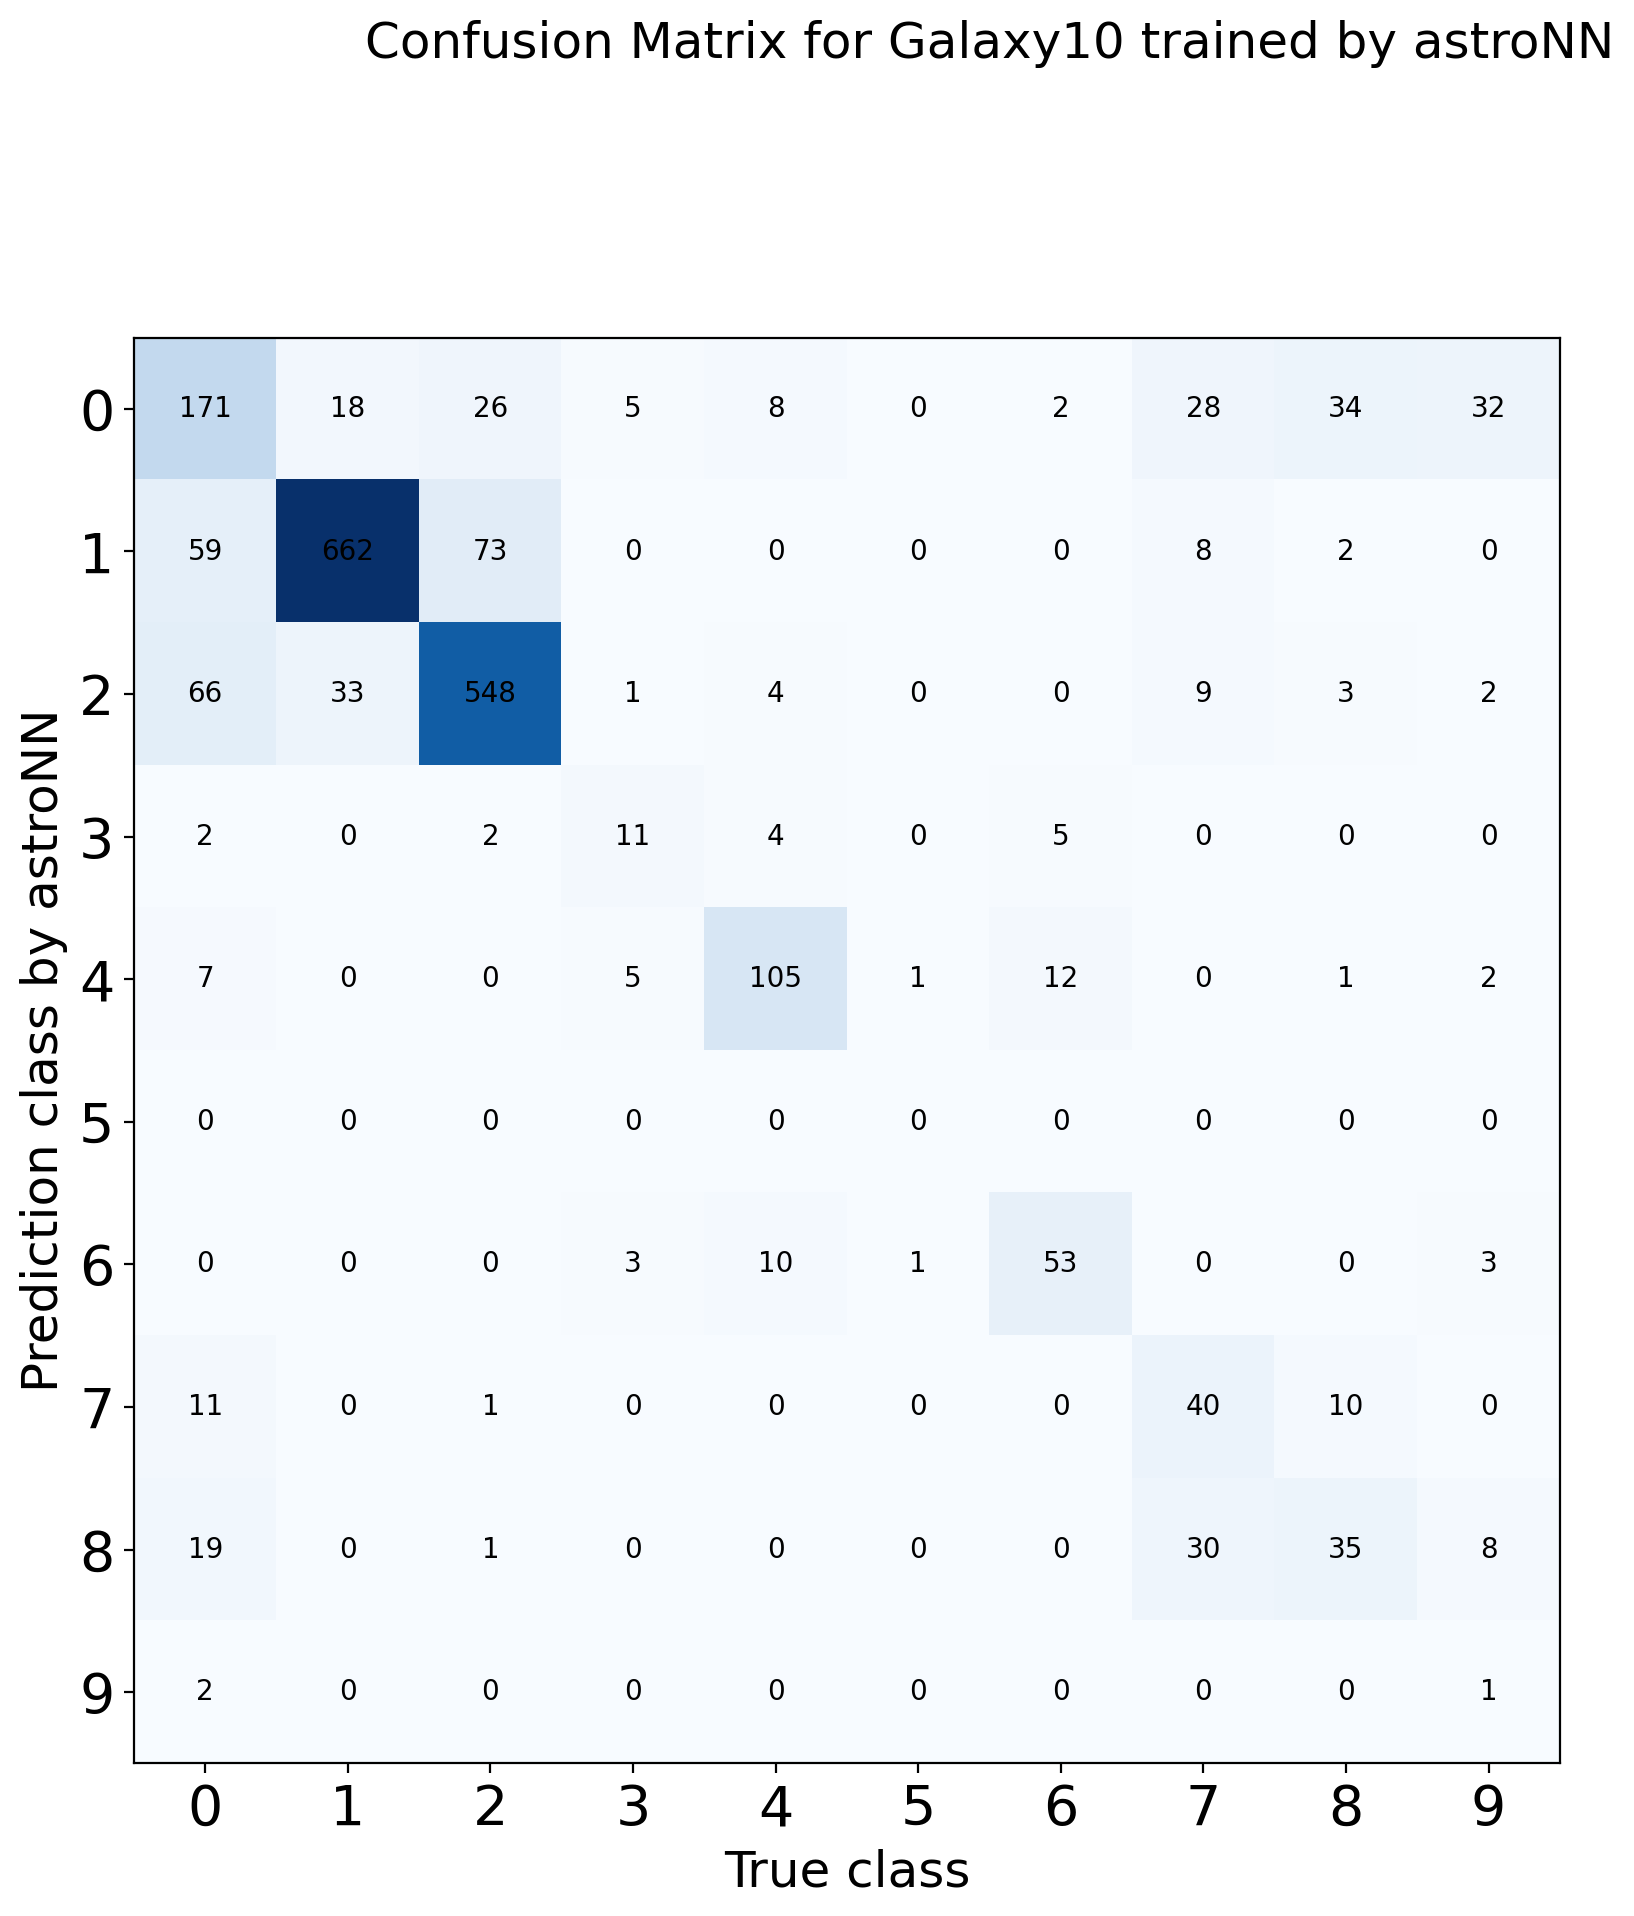

In [2]:
# To create a neural network instance
galaxy10net = Galaxy10CNN()
# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 15

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)

Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Epoch 1/50
Epoch 1/50
275/275 - 25s - loss: 11.2348 - categorical_accuracy: 0.2884 - val_loss: 1.9628 - val_categorical_accuracy: 0.2453
Epoch 2/50
Epoch 1/50
275/275 - 24s - loss: 1.6710 - categorical_accuracy: 0.3546 - val_loss: 0.6595 - val_categorical_accuracy: 0.4146
Epoch 3/50
Epoch 1/50
275/275 - 24s - loss: 1.4996 - categorical_accuracy: 0.4249 - val_loss: 0.0640 - val_categorical_accuracy: 0.0000e+00
Epoch 4/50
Epoch 1/50
275/275 - 23s - loss: 1.3642 - categorical_accuracy: 0.4940 - val_loss: 0.0731 - val_categorical_accuracy: 0.0000e+00
Epoch 5/50
Epoch 1/50

Epoch 24/50
Epoch 1/50
275/275 - 74s - loss: 0.9023 - categorical_accuracy: 0.7157 - val_loss: 0.1338 - val_categorical_accuracy: 0.0000e+00
Epoch 25/50
Epoch 1/50
275/275 - 73s - loss: 0.8827 - categorical_accuracy: 0.7208 - val_loss: 0.1357 - val_categorical_accuracy: 0.0000e+00
Epoch 26/50
Epoch 1/50
275/275 - 72s - loss: 0.8751 - categorical_accuracy: 0.7274 - val_loss: 0.1355 - val_categorical_accuracy: 0.0000e+00
Epoch 27/50
Epoch 1/50
275/275 - 73s - loss: 0.8778 - categorical_accuracy: 0.7261 - val_loss: 0.1380 - val_categorical_accuracy: 0.0000e+00
Epoch 28/50
Epoch 1/50
275/275 - 73s - loss: 0.8783 - categorical_accuracy: 0.7265 - val_loss: 0.1367 - val_categorical_accuracy: 0.0000e+00
Epoch 29/50
Epoch 1/50
275/275 - 75s - loss: 0.8615 - categorical_accuracy: 0.7316 - val_loss: 0.1374 - val_categorical_accuracy: 0.0000e+00
Epoch 30/50
Epoch 1/50
275/275 - 74s - loss: 0.8586 - categorical_accuracy: 0.7314 - val_loss: 0.1372 - val_categorical_accuracy: 0.0000e+00
Epoch 31/50
E

275/275 - 70s - loss: 0.8215 - categorical_accuracy: 0.7522 - val_loss: 0.1482 - val_categorical_accuracy: 0.0000e+00
Epoch 49/50
Epoch 1/50
275/275 - 73s - loss: 0.8238 - categorical_accuracy: 0.7533 - val_loss: 0.1478 - val_categorical_accuracy: 0.0000e+00
Epoch 50/50
Epoch 1/50
275/275 - 71s - loss: 0.8078 - categorical_accuracy: 0.7549 - val_loss: 0.1458 - val_categorical_accuracy: 0.0000e+00
Completed Training, 4530.95s in total
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 69, 69, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 8)         224       
_________________________________________________________________
activation_8 (Activation)    (None, 69, 69, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)

/Users/mbozzore/opt/anaconda3/envs/astronn/lib/python3.6/site-packages/astroNN/datasets/galaxy10.py:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


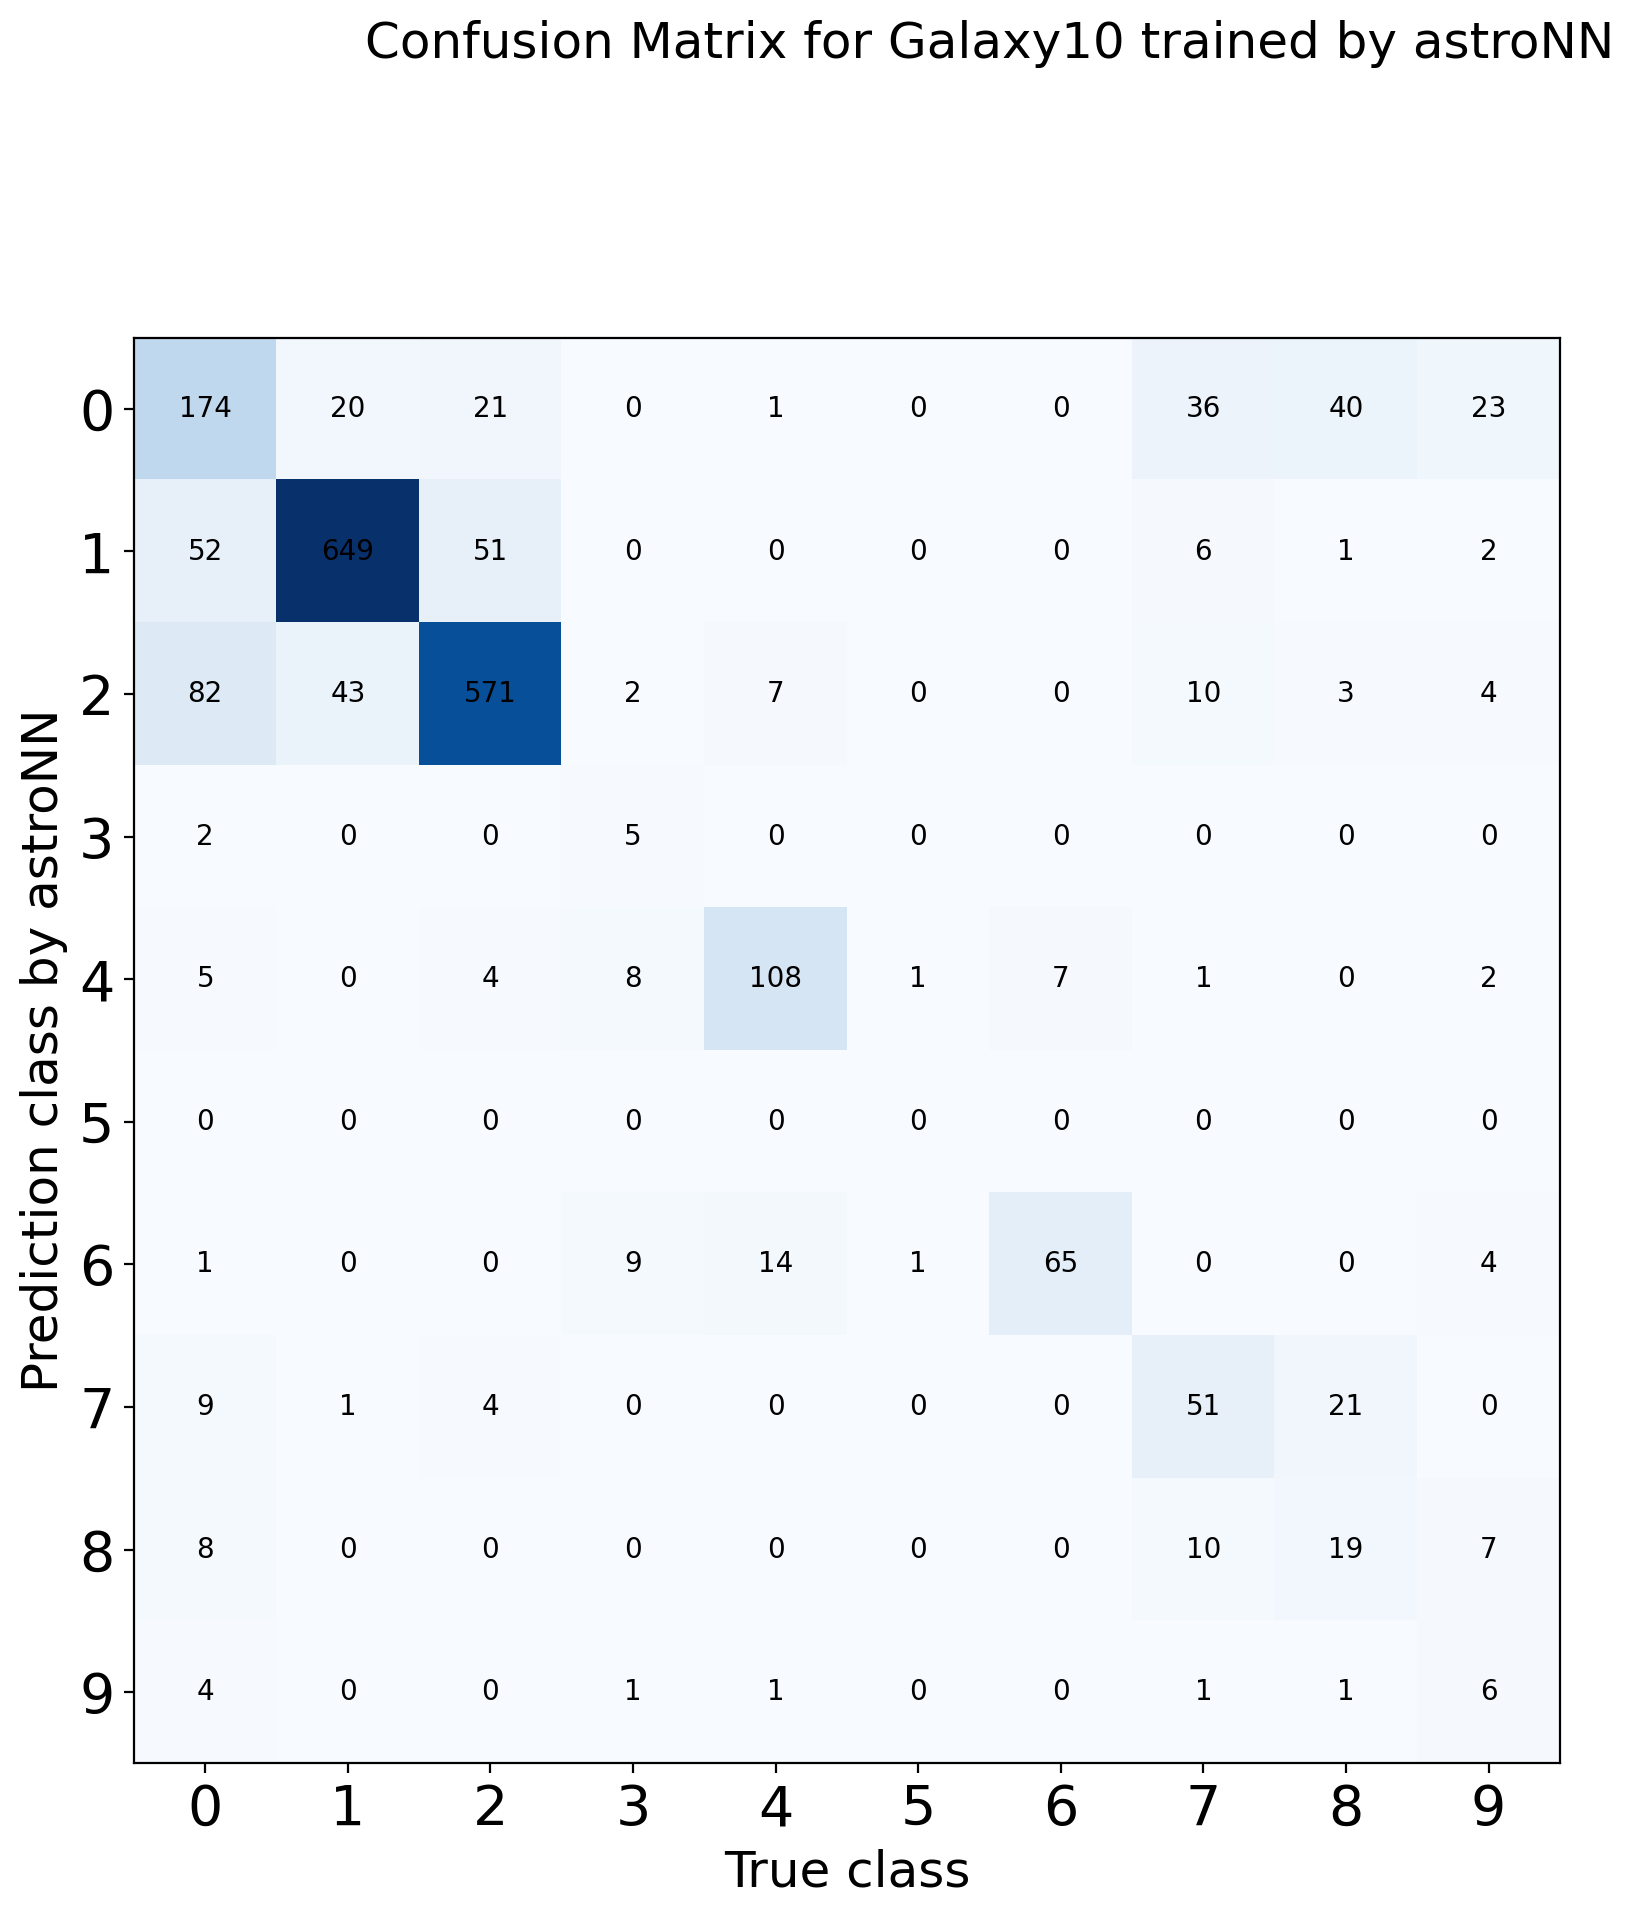

In [3]:
# To create a neural network instance
galaxy10net = Galaxy10CNN()
# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 50

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)